## Project Name : Customer Segementation using Machine Learning

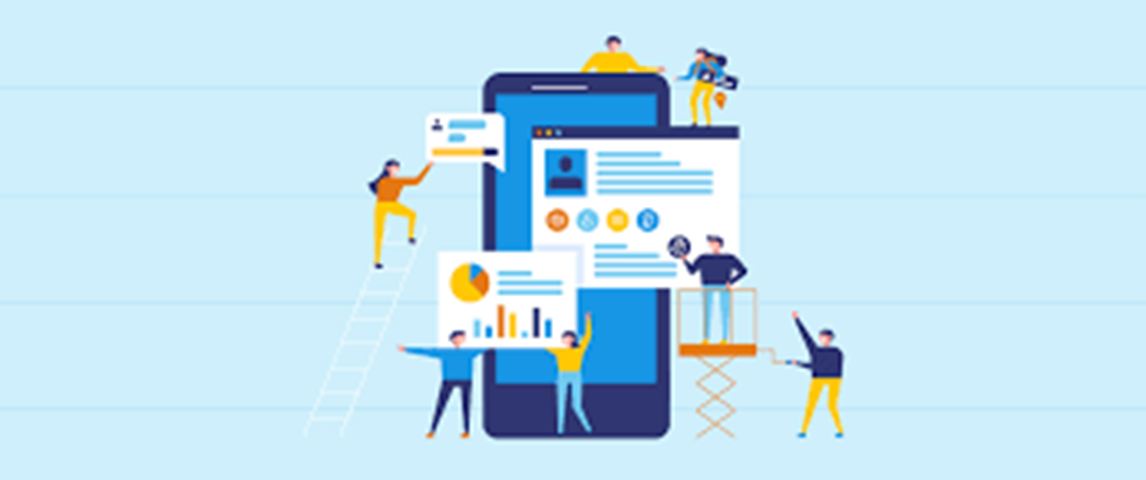

In marketing, market segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers based on some type of shared characteristics.

We will be using Machine Learning to perform Customer Segmentation 

#### Time Line of the project:
- Importing Libraries
- Data Analysis
- Data Preprocessing'
- Model Building

#### Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('Train.csv')
df.head()

### Data Analysis

__Checking for Datatypes__

In [ ]:
#info 
df.info()

In [ ]:
df['Segmentation'].value_counts()

In [ ]:
#describe
df.describe()

**Checking for column names**

In [ ]:
col= df.columns
col

#### Checking null values

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df= df.dropna()

In [ ]:
df.isnull().sum()

#### Data Analysis

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Work_Experience' , 'Family_Size']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [ ]:
# check for segmentation columns
df.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean')

In [ ]:
df.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean').plot(kind = 'bar')

In [ ]:
df.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean')

In [ ]:
df.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean').plot(kind = 'bar')

In [ ]:
# we will check for profession by gender
df.groupby(['Profession','Gender'])[['Gender']].count()

In [ ]:
df.groupby(['Profession','Gender'])[['Gender']].count().plot(kind= 'bar')

In [ ]:
# check the spending score by Gender
df.groupby(['Gender','Spending_Score'])[['Spending_Score']].count()

In [ ]:
df.groupby(['Gender','Spending_Score'])[['Spending_Score']].count().plot(kind = 'barh')

In [ ]:
sns.pairplot(df)

__Checking for correlation__

In [ ]:
sns.heatmap(df.corr(),annot = True)

In [ ]:
df

## Moving with Supervised Approach

### Data Preprocessing

One Hot Encoding

In [ ]:
var = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
df_dummies = pd.get_dummies(df,columns=var)
print(df_dummies.columns.tolist())

**Using Label encoder to encode Segmentation column**

In [ ]:
le = LabelEncoder()
df_dummies['Segmentation'] = le.fit_transform(df_dummies['Segmentation'])


In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df['Segmentation'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_dummies['Segmentation'].value_counts().plot(kind = 'bar')
plt.show()

__Divide the data into train and test set__

In [ ]:
X = df_dummies.drop(['Segmentation','ID'],axis = 1)
y = df_dummies['Segmentation']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

**Decision Tree**

In [ ]:
dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
pred= dct.predict(X_test)

In [ ]:
score= accuracy_score(pred,y_test)
score

__Random Forest__

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
pred1= rf.predict(X_test)

In [ ]:
score= accuracy_score(pred1,y_test)
score

## UnSupervised Approach

Using K Means Clustering

In [ ]:
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans


1) Segmentation using Age and Family Size

In [ ]:
df

In [ ]:
X1 = df[['Age' , 'Family_Size']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
plt.figure(1 , figsize = (15 , 7) )


plt.scatter( x = 'Age' ,y = 'Family_Size' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Family Size') , plt.xlabel('Age')
plt.show()